In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#reading the dataset using pandas
dataset=pd.read_csv('Salary_Data.csv')

In [3]:
#Displaying the top 5 values of dataset
dataset.head()

,YearsExperience,Salary
0,1,25000
1,2,30000
2,3,32000
3,4,35000
4,5,38000


In [4]:
#Describing the various statistical concepts
dataset.describe()

,YearsExperience,Salary
count,15.000000,15.000000
mean,8.000000,51600.000000
std,4.472136,21259.619671
min,1.000000,25000.000000
25%,4.500000,36500.000000
50%,8.000000,45000.000000
75%,11.500000,67500.000000
max,15.000000,90000.000000


In [5]:
#Analyzing if there is any null value in our dataset or not
dataset.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

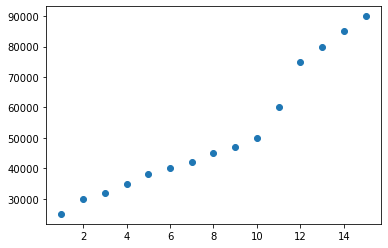

In [6]:
#Plotting the reltionship between dependent and indipendent variables 
plt.scatter(x='YearsExperience' ,y='Salary',data=dataset)

In [7]:
#using indexing to select the dependent and indipendent variable of our dataset
X=dataset.iloc[:,[0]].values
y=dataset.iloc[:,[1]].values
print(dataset)
print(X)
print(y)

    YearsExperience  Salary
0                 1   25000
1                 2   30000
2                 3   32000
3                 4   35000
4                 5   38000
5                 6   40000
6                 7   42000
7                 8   45000
8                 9   47000
9                10   50000
10               11   60000
11               12   75000
12               13   80000
13               14   85000
14               15   90000
[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]]
[[25000]
 [30000]
 [32000]
 [35000]
 [38000]
 [40000]
 [42000]
 [45000]
 [47000]
 [50000]
 [60000]
 [75000]
 [80000]
 [85000]
 [90000]]


In [8]:
dataset.head(2)

,YearsExperience,Salary
0,1,25000
1,2,30000


In [9]:
#Mean of X and Y
mean_x=np.mean(X)
mean_y=np.mean(y)

In [10]:
#Total number of values
n=len(X)

In [11]:
#using the formula to calculate m and c
numer=0
denom=0
for i in range(n):
    numer+=(X[i] - mean_x) * (y[i]- mean_y)
    denom+=(X[i]-mean_x)**2
m=numer/denom
c=mean_y- (m*mean_x)

In [12]:
print(m,c)

[4557.14285714] [15142.85714286]


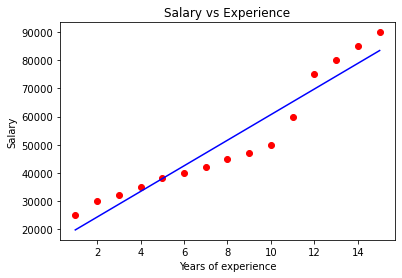

In [14]:
#plot the actual data points of training set
plt.scatter(X,y,color='red')
y=m*X+c
plt.plot(X,y,color='blue')
plt.title("Salary vs Experience")
plt.xlabel("Years of experience")#indipendent variable
plt.ylabel("Salary")#dependent variable
plt.show()

In [16]:
#split the data into training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=1/3,random_state=0)
#test data=1/3
#train data=2/3
# print("X- training data")
print(X_train)
# print("X- testing data")
print(X_test)
# print("y- training data")
print(y_train)
# print("y- testing data")
print(y_test)

[[ 5]
 [ 3]
 [14]
 [11]
 [ 8]
 [12]
 [ 4]
 [ 1]
 [ 6]
 [13]]
[[ 2]
 [ 7]
 [ 9]
 [10]
 [15]]
[[37928.57142857]
 [28814.28571429]
 [78942.85714286]
 [65271.42857143]
 [51600.        ]
 [69828.57142857]
 [33371.42857143]
 [19700.        ]
 [42485.71428571]
 [74385.71428571]]
[[24257.14285714]
 [47042.85714286]
 [56157.14285714]
 [60714.28571429]
 [83500.        ]]


In [19]:
X_train.shape

(10, 1)

In [21]:
y_train.shape

(10, 1)

In [23]:
#Fit simple Linear Regression to Training data
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()#Creating object for Linear Regression
regressor.fit(X_train, y_train)#Fitting the model by training data

LinearRegression()

In [25]:
#Make prediction
y_pred=regressor.predict(X_test)
#We need to pass the testing data for prediction purpose
#x_test= year value from the testing data
#y_pred=this will predict the salary according to the year

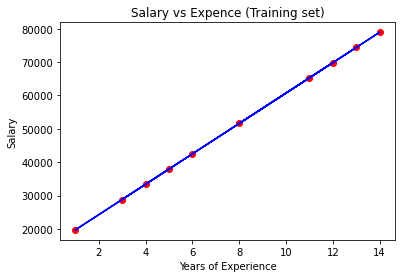

In [26]:
#Visulaizing the training set results
#plot the actual data points of training set
plt.scatter(X_train,y_train,color='red')
#plot the regression line
plt.plot(X_train,regressor.predict(X_train), color='blue')
plt.title("Salary vs Expence (Training set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

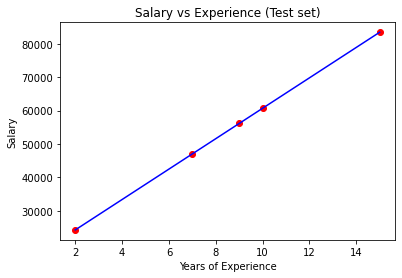

In [27]:
# plot the actual data points of test set
plt.scatter(X_test, y_test, color = 'red')
# plot the regression line (same as above)
plt.plot(X_test, regressor.predict(X_test), color='blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [28]:
#Making new prediction
new_salary_pred= regressor.predict([[20]])
print('The predicted value of a person with 15 years experience is ', new_salary_pred)

The predicted value of a person with 15 years experience is  [[106285.71428571]]


In [29]:
#printing values of slope and intercept
print('Slope', regressor.coef_)
print("Intercept", regressor.intercept_)

Slope [[4557.14285714]]
Intercept [15142.85714286]


In [30]:
#Finding residuals
from sklearn import metrics
print ('MSE:',metrics.mean_squared_error(y_test,y_pred))
print ('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print ('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MSE: 6.617444900424221e-23
MAE: 5.093170329928398e-12
RMSE: 8.134767913360665e-12
